In this project, I explore global energy production and consumption data to understand how renewable sources are 
evolving compared to fossil fuels.

Importing the libraries and data

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
data = pd.read_csv('World Energy Consumption.csv')

In [33]:
data.head(2)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [34]:
data.isna().sum()


country                       0
year                          0
iso_code                   5500
population                 3889
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 129, dtype: int64

In [35]:
data.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [15]:
data.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

In [36]:
data.isna().sum().sort_values(ascending=False)

biofuel_cons_change_pct    20265
solar_cons_change_pct      19888
biofuel_cons_per_capita    19710
wind_cons_change_pct       19599
nuclear_cons_change_pct    19545
                           ...  
oil_prod_change_twh         4864
oil_production              4607
population                  3889
year                           0
country                        0
Length: 129, dtype: int64

Let's clean the data and get rid of the columns where more than half of the entries are NaN. 
First, let's see what percentage of each column is NaN.

In [37]:
(data.isna().mean() * 100).sort_values(ascending=False)


biofuel_cons_change_pct    92.063420
solar_cons_change_pct      90.350718
biofuel_cons_per_capita    89.542068
wind_cons_change_pct       89.037798
nuclear_cons_change_pct    88.792477
                             ...    
oil_prod_change_twh        22.097038
oil_production             20.929493
population                 17.667636
year                        0.000000
country                     0.000000
Length: 129, dtype: float64

In [39]:
data_clean = data.copy()
data_clean = data_clean.dropna(axis=1, thresh=len(data_clean) * 0.4)


In [42]:
data_clean.head(5)

,country,year,iso_code,population,gdp,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,energy_cons_change_pct,...,gas_prod_change_twh,gas_prod_per_capita,gas_production,hydro_electricity,low_carbon_electricity,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,primary_energy_consumption
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,50.37,72.90,NaN,NaN,NaN,NaN,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,54.26,76.68,NaN,NaN,NaN,NaN,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,53.32,75.99,NaN,NaN,NaN,NaN,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,53.28,75.71,NaN,NaN,NaN,NaN,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.88,77.02,NaN,NaN,NaN,NaN,NaN


After the first cleaning, there are still many NaN values in the data. 
So let's remove some rows and look more closely at the first columns to understand the data better.

In [44]:
data_clean[['country','iso_code']]

,country,iso_code
0,ASEAN (Ember),NaN
1,ASEAN (Ember),NaN
2,ASEAN (Ember),NaN
3,ASEAN (Ember),NaN
4,ASEAN (Ember),NaN
...,...,...
22007,Zimbabwe,ZWE
22008,Zimbabwe,ZWE
22009,Zimbabwe,ZWE
22010,Zimbabwe,ZWE


After checking, the ISO_code of country names normally have 3 letters, so let's remove the rows where the ISO code does not follow this

In [48]:
data_clean = data_clean[data_clean['iso_code'].str.len() == 3]

In [49]:
data_clean.head()

,country,year,iso_code,population,gdp,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,energy_cons_change_pct,...,gas_prod_change_twh,gas_prod_per_capita,gas_production,hydro_electricity,low_carbon_electricity,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,primary_energy_consumption
23,Afghanistan,1900,AFG,4707744.0,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Afghanistan,1901,AFG,4751177.0,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Afghanistan,1902,AFG,4802500.0,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Afghanistan,1903,AFG,4861833.0,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Afghanistan,1904,AFG,4921891.0,NaN,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropped rows with missing Data


In [51]:
data_clean = data_clean.dropna(subset=['population', 'primary_energy_consumption'])


In [55]:
data_clean.head()

,country,year,iso_code,population,gdp,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,energy_cons_change_pct,...,gas_prod_change_twh,gas_prod_per_capita,gas_production,hydro_electricity,low_carbon_electricity,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,primary_energy_consumption
103,Afghanistan,1980,AFG,12486640.0,1.532984e+10,-35.709,-0.384,55.329,0.691,NaN,...,-10.477,1475.741,18.427,NaN,NaN,NaN,NaN,0.0,0.0,7.791
104,Afghanistan,1981,AFG,11155196.0,1.564534e+10,5.042,0.035,65.056,0.726,12.663,...,5.835,2174.976,24.262,NaN,NaN,NaN,0.0,0.0,0.0,8.777
105,Afghanistan,1982,AFG,10088290.0,1.598041e+10,16.000,0.116,83.446,0.842,6.505,...,0.614,2465.881,24.877,NaN,NaN,NaN,0.0,0.0,0.0,9.348
106,Afghanistan,1983,AFG,9951447.0,1.675533e+10,0.000,0.000,84.593,0.842,22.334,...,1.228,2623.236,26.105,NaN,NaN,NaN,0.0,0.0,0.0,11.436
107,Afghanistan,1984,AFG,10243689.0,1.707215e+10,2.069,0.017,83.880,0.859,0.462,...,0.000,2548.397,26.105,NaN,NaN,NaN,0.0,0.0,0.0,11.489


Now, I will handle the remaining missing values (NaN).
However, replacing all NaNs with zeros is not appropriate for example, in columns like GDP, a value of 0 has real meaning (it represents zero economic output).
Therefore, I will only fill missing values with 0 for energy-related columns such as production and electricity data, where 0 indicates no production or consumption.
I am copying my data as backup;)!

In [ ]:
data_backup = data_clean.copy()

In [107]:
energy_cols = [col for col in data_clean.columns if 'production' in col or 'electricity' in col]

data_clean[energy_cols] = data_clean[energy_cols].fillna(0)


In [109]:
# Check a few columns to confirm
data_clean[energy_cols].isna().sum().sort_values(ascending=False).head()


coal_production           0
gas_production            0
hydro_electricity         0
low_carbon_electricity    0
oil_production            0
dtype: int64

In [60]:
data_clean.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita',
       'coal_production', 'energy_cons_change_pct', 'energy_cons_change_twh',
       'energy_per_capita', 'gas_prod_change_twh', 'gas_prod_per_capita',
       'gas_production', 'hydro_electricity', 'low_carbon_electricity',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'oil_prod_per_capita',
       'oil_production', 'primary_energy_consumption'],
      dtype='object')

In [62]:
data_clean['hydro_electricity']

103      0.00
104      0.00
105      0.00
106      0.00
107      0.00
         ... 
22006    3.97
22007    5.05
22008    4.17
22009    3.81
22010    4.00
Name: hydro_electricity, Length: 9842, dtype: float64

Next, I will visualize the cleaned data to better understand global energy production and consumption trends.

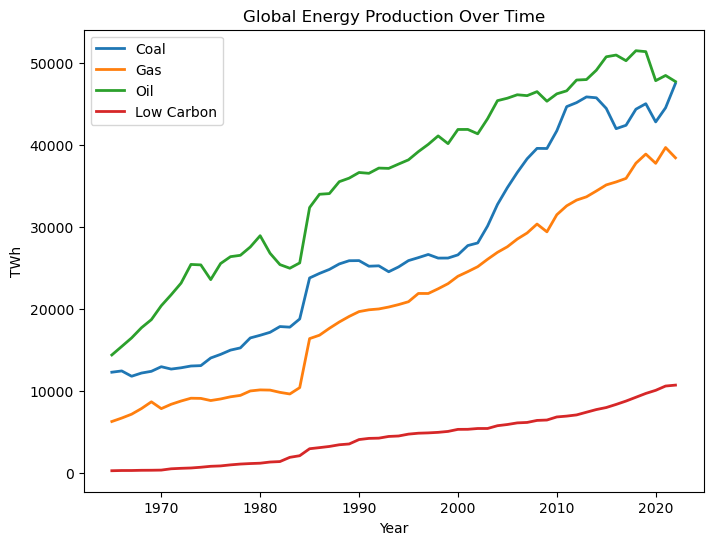

In [83]:

data_global = data_clean.groupby('year')[['coal_production','gas_production','oil_production','low_carbon_electricity']].sum().reset_index()

plt.figure(figsize=(8,6))
sns.lineplot(data=data_global, x='year', y='coal_production', label='Coal',lw='2')
sns.lineplot(data=data_global, x='year', y='gas_production', label='Gas',lw='2')
sns.lineplot(data=data_global, x='year', y='oil_production', label='Oil',lw ='2')
sns.lineplot(data=data_global, x='year', y='low_carbon_electricity', label='Low Carbon',lw='2')
plt.title('Global Energy Production Over Time')
plt.xlabel('Year'); plt.ylabel('TWh')
plt.legend()
plt.show()



Oil dominates total energy production, but low-carbon energy shows consistent growth especially after 2000.

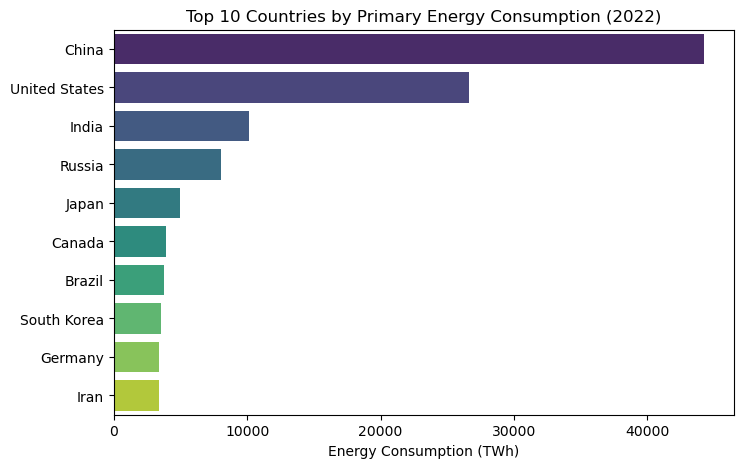

In [75]:
latest_year = data_clean['year'].max()
top_countries = data_clean[data_clean['year']==latest_year].nlargest(10, 'primary_energy_consumption')

plt.figure(figsize=(8,5))
sns.barplot(data=top_countries, y='country', x='primary_energy_consumption', palette='viridis')
plt.title(f'Top 10 Countries by Primary Energy Consumption ({latest_year})')
plt.xlabel('Energy Consumption (TWh)')
plt.ylabel('')
plt.show()


The largest consumers (China, USA, India) dominate total energy use.

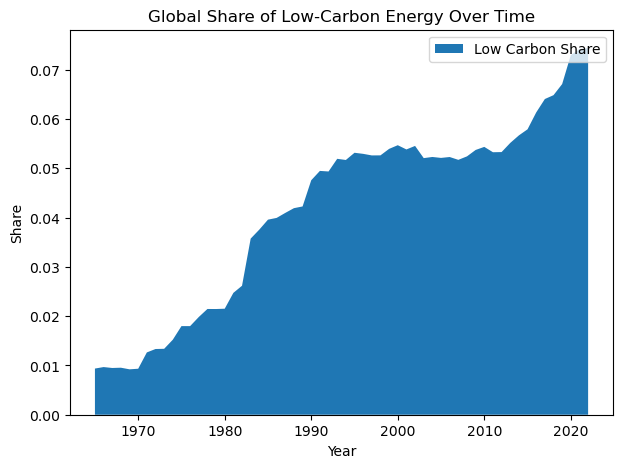

In [133]:
data_share = data_global.copy()
data_share['fossil'] = data_share[['coal_production','gas_production','oil_production']].sum(axis=1)
data_share['low_carbon_share'] = data_share['low_carbon_electricity'] / (data_share['fossil'] + data_share['low_carbon_electricity'])
data_share['fossil_share'] = data_share['fossil'] / (data_share['fossil'] + data_share['low_carbon_electricity'])
plt.figure(figsize=(7,5))
plt.stackplot(data_share['year'], data_share['low_carbon_share'], labels=['Low Carbon Share'])
plt.title('Global Share of Low-Carbon Energy Over Time')
plt.xlabel('Year'); plt.ylabel('Share')
plt.legend()
plt.show()


The share of low-carbon energy has grown slowly, more visible after 2010.

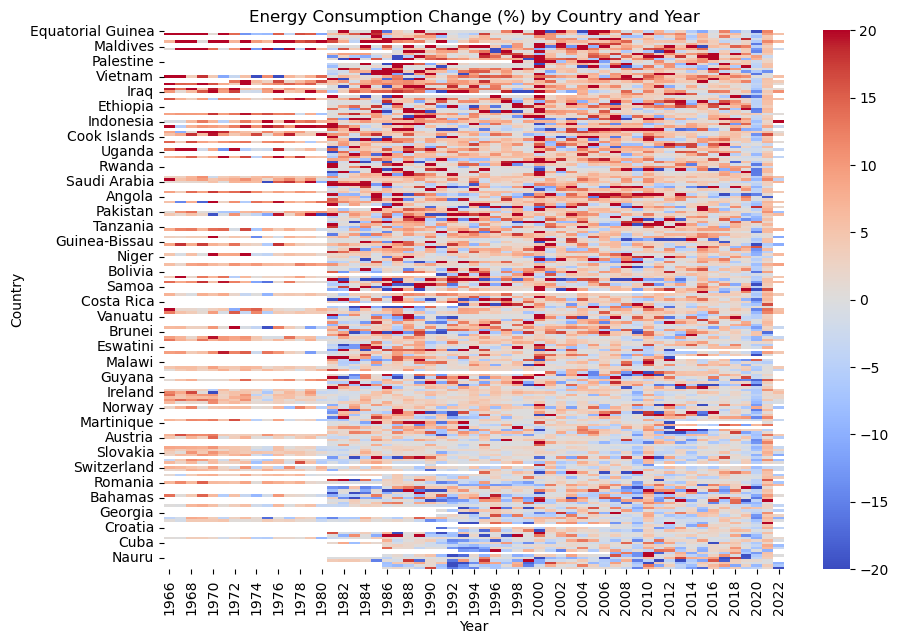

In [129]:
plt.figure(figsize=(10,7))
pivot = data_clean.pivot_table(values='energy_cons_change_pct',
                               index='country', columns='year')
pivot = pivot.loc[pivot.mean(axis=1).sort_values(ascending=False).index]
sns.heatmap(pivot.clip(-20,20), cmap='coolwarm', center=0)
plt.title('Energy Consumption Change (%) by Country and Year')
plt.xlabel('Year'); plt.ylabel('Country')
plt.show()


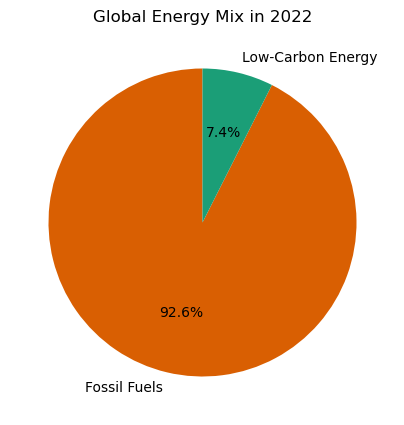

In [134]:
latest = data_share.iloc[-1]
mix = {
    'Fossil Fuels': latest['fossil'],
    'Low-Carbon Energy': latest['low_carbon_electricity']
}

plt.figure(figsize=(5,5))
plt.pie(mix.values(), labels=mix.keys(), autopct='%1.1f%%', startangle=90,
        colors=['#d95f02', '#1b9e77'])
plt.title(f'Global Energy Mix in {int(latest["year"])}')
plt.show()


Conclusion:

After cleaning and aggregating data from Our World in Data, key insights emerged:
- Fossil fuels still dominate -Oil, gas, and coal remain the largest sources of global energy production, accounting for the vast majority of total output.
- Low-carbon energy is growing—but slowly.
- Renewables and other low-carbon sources have shown steady growth, particularly since 2000.
- A small group of countries—primarily China, the United States, and India—account for a major portion of global energy consumption.
